In [138]:
import MCForecastTools
def MCForecastTools(arg):
    from MCForecastTools import MCSimulation

In [142]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import json

%matplotlib inline

In [143]:

# Load .env enviroment variables
from dotenv import load_dotenv
load_dotenv()

True

In [144]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [145]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [146]:
# Fetch current BTC price
btc_response = requests.get(btc_url).json()
btc_price = btc_response["data"]["1"]["quotes"]["USD"]["price"]

# Fetch current ETH price
eth_response = requests.get(eth_url).json()
eth_response
eth_price = eth_response["data"]["1027"]["quotes"]["USD"]["price"]

# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $51522.00
The current value of your 5.3 ETH is $15742.80


In [147]:
# Set current amount of shares
my_agg = 200
my_spy = 50


In [148]:
cd /Users/JakeDoherty_1/Documents/BOOTCAMP/APIS 

/Users/JakeDoherty_1/Documents/BOOTCAMP/APIS


In [149]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2")

In [150]:
# Format current date as ISO format
today = pd.Timestamp("2021-06-25", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
investment_portfolio = alpaca.get_barset(tickers, timeframe, end=today, limit=1000).df.sort_index(ascending=False)

# Preview DataFrame
investment_portfolio.head()

AGG                                        \
                             open     high       low   close     volume   
time                                                                      
2021-06-25 00:00:00-04:00  115.11  115.130  114.7516  114.89  3987588.0   
2021-06-24 00:00:00-04:00  115.10  115.170  115.0450  115.07  6672880.0   
2021-06-23 00:00:00-04:00  115.06  115.138  114.9900  115.05  5000374.0   
2021-06-22 00:00:00-04:00  114.83  115.140  114.8300  115.11  5299846.0   
2021-06-21 00:00:00-04:00  115.06  115.120  114.9210  114.96  4934966.0   

                              SPY                                        
                             open      high     low   close      volume  
time                                                                     
2021-06-25 00:00:00-04:00  425.90  427.0943  425.55  426.57  50460394.0  
2021-06-24 00:00:00-04:00  424.89  425.5500  424.62  425.09  39863529.0  
2021-06-23 00:00:00-04:00  423.19  424.0500  422.51  422.60  41476351.0  
2021-06-22 00:00:00-04:00  420.85  424.0000  420.08  423.06  50857233.0  
2021-06-21 00:00:00-04:00  416.80  421.0600  415.93  420.85  63727942.0

In [151]:
# Pick AGG and SPY close prices
agg_close_price = investment_portfolio["AGG"]["close"][0]
spy_close_price = investment_portfolio["SPY"]["close"][0]
agg_close_price

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.89
Current SPY closing price: $426.57


In [152]:
# Compute the current value of shares
my_agg_value = my_agg * agg_close_price
my_spy_value = my_spy * spy_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $21328.50
The current value of your 200 AGG shares is $22978.00


In [153]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
# Consolidate crypto holdings
crypto = my_btc_value + my_eth_value

# Consolidate equity holdings
shares = my_agg_value + my_spy_value

# Create list for creation of savings DataFrame
savings = [crypto, shares]

# Create savings DataFrame
df_savings = pd.DataFrame(savings, index=["crypto", "shares"], columns=["amount"])

# Display savings DataFrame
display(df_savings)

amount
crypto  67264.802
shares  44306.500

<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

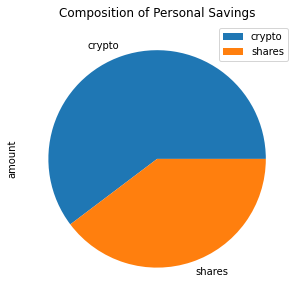

In [154]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", figsize=(10,5), title="Composition of Personal Savings")

In [155]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = float(df_savings.sum())

# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations! You've raised more than enough for your emergency fund!")
elif total_savings == emergency_fund:
    print("Congratulations! You've met your emergency fund savings goal!")
else:
    print(f"You are ${(emergency_fund - total_savings):0.2f} away from your emergency fund savings goal. Let's keep saving!")

Congratulations! You've raised more than enough for your emergency fund!


In [156]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [157]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)

df_stock_data = alpaca.get_barset(tickers, timeframe, start=start_date, end=end_date, limit=1000).df
# Display sample data
df_stock_data.head()

AGG                                       \
                             open     high       low    close   volume   
time                                                                     
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153   
2017-05-17 00:00:00-04:00  109.35  109.600  109.2800  109.560  2263851   

                              SPY                                      
                             open    high     low    close     volume  
time                                                                   
2017-05-11 00:00:00-04:00  239.35  239.57  238.13  239.410   45435690  
2017-05-12 00:00:00-04:00  239.09  239.21  238.67  239.030   35283567  
2017-05-15 00:00:00-04:00  239.47  240.44  239.45  240.245   42230620  
2017-05-16 00:00:00-04:00  240.62  240.67  239.63  240.100   37206183  
2017-05-17 00:00:00-04:00  238.10  238.64  235.75  235.850  118613594

In [158]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_even_dist = MCSimulation(portfolio_data = df_stock_data, weights = [.40,.60], num_simulation = 500, num_trading_days = 252*30)

In [159]:
# Printing the simulation input data
MC_even_dist.portfolio_data.head()

AGG                                       \
                             open     high       low    close   volume   
time                                                                     
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153   
2017-05-17 00:00:00-04:00  109.35  109.600  109.2800  109.560  2263851   

                                           SPY                           \
                          daily_return    open    high     low    close   
time                                                                      
2017-05-11 00:00:00-04:00          NaN  239.35  239.57  238.13  239.410   
2017-05-12 00:00:00-04:00     0.003732  239.09  239.21  238.67  239.030   
2017-05-15 00:00:00-04:00    -0.000275  239.47  240.44  239.45  240.245   
2017-05-16 00:00:00-04:00     0.001010  240.62  240.67  239.63  240.100   
2017-05-17 00:00:00-04:00     0.005138  238.10  238.64  235.75  235.850   

                                                   
                              volume daily_return  
time                                               
2017-05-11 00:00:00-04:00   45435690          NaN  
2017-05-12 00:00:00-04:00   35283567    -0.001587  
2017-05-15 00:00:00-04:00   42230620     0.005083  
2017-05-16 00:00:00-04:00   37206183    -0.000604  
2017-05-17 00:00:00-04:00  118613594    -0.017701

In [160]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/var/folders/pb/9nrds4y576x41j1jw01gnkc40000gn/T/ipykernel_26955/776565063.py:116: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

0         1          2          3          4          5    \
0     1.000000  1.000000   1.000000   1.000000   1.000000   1.000000   
1     0.997783  1.007293   0.995163   1.013551   1.006217   0.993492   
2     1.001090  1.004048   0.991173   1.012850   0.999794   0.994554   
3     1.021018  1.001155   0.987185   1.027763   0.998529   0.983341   
4     1.019941  0.999973   0.972797   1.024227   1.003025   0.994423   
...        ...       ...        ...        ...        ...        ...   
7556  4.188053  8.866196  13.887049  58.955439  48.722674  57.707025   
7557  4.159783  8.851549  13.844765  58.343153  48.376304  57.900984   
7558  4.086931  8.851336  13.931460  58.345595  48.607785  57.846259   
7559  4.026561  8.900597  13.860770  59.004076  48.467314  58.571060   
7560  4.012949  8.876624  14.057114  59.162657  48.825537  59.049684   

            6         7          8         9    ...        490       491  \
0      1.000000  1.000000   1.000000  1.000000  ...   1.000000  1.000000   
1      1.012303  0.989130   1.008899  0.999693  ...   1.012040  0.990774   
2      1.011415  0.990835   1.025434  0.988002  ...   1.021878  0.994495   
3      1.021921  0.997427   1.019335  1.000618  ...   1.030214  0.998955   
4      1.023502  0.992047   1.012167  1.001547  ...   1.026150  1.007575   
...         ...       ...        ...       ...  ...        ...       ...   
7556  15.798651  8.283395  31.430466  9.586427  ...  49.450373  8.005742   
7557  15.741415  8.227102  31.315688  9.597328  ...  49.373456  7.985385   
7558  15.718833  8.269398  31.455203  9.631565  ...  49.854423  8.081336   
7559  15.668805  8.313019  31.541883  9.755897  ...  49.640640  8.004696   
7560  15.750525  8.376646  31.296343  9.865318  ...  49.455984  8.152328   

            492        493        494       495        496        497  \
0      1.000000   1.000000   1.000000  1.000000   1.000000   1.000000   
1      0.990153   1.008116   0.998185  1.003881   0.987088   1.010734   
2      0.978904   1.018192   0.999141  1.001616   0.996837   1.022999   
3      0.989194   1.020074   1.004254  1.016948   1.000849   1.017779   
4      0.983117   1.035684   1.005739  1.009378   1.000323   1.016329   
...         ...        ...        ...       ...        ...        ...   
7556  71.253218  16.114884  29.870386  6.343343  29.226714  40.388801   
7557  71.518890  16.230120  29.911420  6.353026  29.556546  40.333945   
7558  71.857186  15.983980  29.964441  6.302762  29.489182  40.300795   
7559  72.290125  15.964188  29.996122  6.438851  29.283241  41.087891   
7560  71.798636  16.094177  30.008303  6.385998  29.039636  40.567229   

            498        499  
0      1.000000   1.000000  
1      1.005442   1.009029  
2      1.007738   0.999869  
3      1.005417   0.995824  
4      1.005002   1.002621  
...         ...        ...  
7556  46.410489  18.042783  
7557  47.013814  17.772699  
7558  47.128020  17.703008  
7559  47.920964  17.594151  
7560  47.189829  17.689264  

[7561 rows x 500 columns]

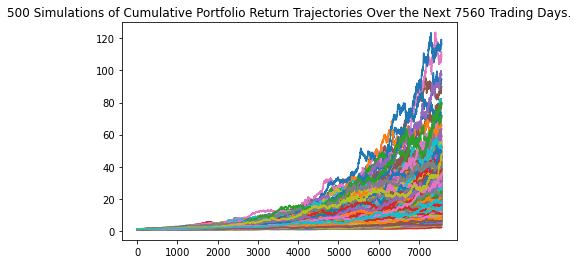

In [161]:
# Plot simulation outcomes
line_plot = MC_even_dist.plot_simulation()

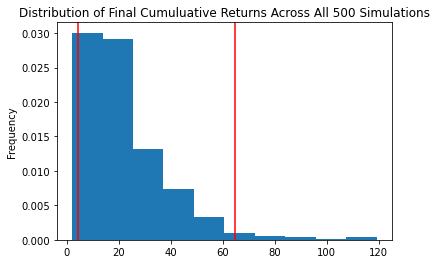

In [162]:
# Plot probability distribution and confidence intervals
dist_plot = MC_even_dist.plot_distribution()

In [163]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl = MC_even_dist.summarize_cumulative_return()
# Print summary statistics
print(even_tbl)

count           500.000000
mean             22.413001
std              16.405351
min               2.136333
25%              11.034496
50%              17.984398
75%              28.925351
max             119.211573
95% CI Lower      4.347639
95% CI Upper     64.605513
Name: 7560, dtype: float64


In [164]:
# Set initial investment
initial_investment = 20000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(even_tbl[8]*20000,2)
ci_upper = round(even_tbl[9]*20000,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $86952.77 and $1292110.26


In [165]:
# Set initial investment
initial_investment = 20000 * 1.5
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(even_tbl[8]*30000,2)
ci_upper = round(even_tbl[9]*30000,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $130429.16 and $1938165.38


In [166]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_even_dist_five = MCSimulation(portfolio_data = df_stock_data, weights = [.40,.60], num_simulation = 500, num_trading_days = 252*5)
MC_even_dist_five.portfolio_data.head()

AGG                                       \
                             open     high       low    close   volume   
time                                                                     
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153   
2017-05-17 00:00:00-04:00  109.35  109.600  109.2800  109.560  2263851   

                                           SPY                           \
                          daily_return    open    high     low    close   
time                                                                      
2017-05-11 00:00:00-04:00          NaN  239.35  239.57  238.13  239.410   
2017-05-12 00:00:00-04:00     0.003732  239.09  239.21  238.67  239.030   
2017-05-15 00:00:00-04:00    -0.000275  239.47  240.44  239.45  240.245   
2017-05-16 00:00:00-04:00     0.001010  240.62  240.67  239.63  240.100   
2017-05-17 00:00:00-04:00     0.005138  238.10  238.64  235.75  235.850   

                                                   
                              volume daily_return  
time                                               
2017-05-11 00:00:00-04:00   45435690          NaN  
2017-05-12 00:00:00-04:00   35283567    -0.001587  
2017-05-15 00:00:00-04:00   42230620     0.005083  
2017-05-16 00:00:00-04:00   37206183    -0.000604  
2017-05-17 00:00:00-04:00  118613594    -0.017701

In [168]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_even_dist_five.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/var/folders/pb/9nrds4y576x41j1jw01gnkc40000gn/T/ipykernel_26955/776565063.py:116: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     0.999111  1.001514  1.003303  1.008889  1.004963  1.007754  0.989936   
2     0.993188  1.001266  1.004466  1.001461  1.001750  1.007027  0.999383   
3     0.978521  1.003644  1.008169  1.001427  1.011766  1.012435  0.999977   
4     0.980210  1.006136  1.018013  1.004013  1.017577  1.010125  0.992482   
...        ...       ...       ...       ...       ...       ...       ...   
1256  2.100976  3.267810  1.639440  1.888966  2.417614  1.090747  1.041041   
1257  2.068867  3.310805  1.609137  1.874949  2.429017  1.096287  1.048330   
1258  2.099578  3.308261  1.602231  1.882473  2.428958  1.080746  1.051015   
1259  2.094729  3.316070  1.616158  1.878473  2.431247  1.083116  1.064575   
1260  2.105594  3.315670  1.636764  1.886060  2.427043  1.065636  1.065250   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     1.004020  0.993143  1.006960  ...  0.998516  1.013102  1.013266   
2     0.990501  0.993767  0.999579  ...  1.003515  1.014920  1.031151   
3     0.990107  0.982835  1.010044  ...  1.005707  1.015398  1.032890   
4     0.984096  0.986925  1.022020  ...  0.990936  1.001677  1.027043   
...        ...       ...       ...  ...       ...       ...       ...   
1256  1.519705  2.472729  1.917330  ...  1.657363  2.655499  1.596973   
1257  1.532671  2.490799  1.911166  ...  1.653997  2.644746  1.596852   
1258  1.536920  2.461622  1.900609  ...  1.648986  2.617520  1.599973   
1259  1.524928  2.475126  1.923016  ...  1.643744  2.613010  1.611168   
1260  1.510352  2.471261  1.916551  ...  1.651417  2.625023  1.596247   

           493       494       495       496       497       498       499  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     1.003525  1.010590  1.002106  1.000530  0.995748  0.997350  1.008970  
2     0.998167  1.010836  1.007789  1.000149  0.989464  0.994253  1.006455  
3     1.007780  0.995064  1.002518  1.006301  1.000080  0.986987  1.003499  
4     1.002035  0.998882  1.016866  1.001128  0.998999  0.987555  1.014390  
...        ...       ...       ...       ...       ...       ...       ...  
1256  2.147780  1.546852  2.282718  1.733453  1.138080  1.570564  1.828040  
1257  2.146382  1.549131  2.279938  1.723930  1.142456  1.571764  1.848568  
1258  2.157737  1.530149  2.265508  1.746290  1.123454  1.567795  1.823468  
1259  2.157548  1.535708  2.286626  1.754043  1.120097  1.559753  1.823384  
1260  2.145193  1.549306  2.264332  1.764591  1.107345  1.539457  1.820566  

[1261 rows x 500 columns]

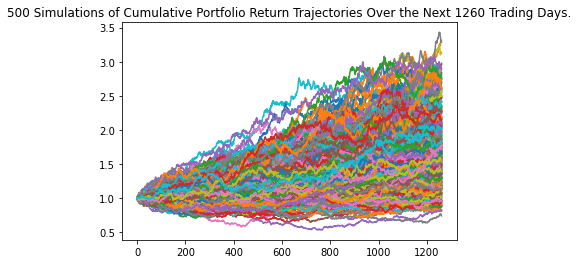

In [169]:
# Plot simulation outcomes
line_plot_five = MC_even_dist_five.plot_simulation()

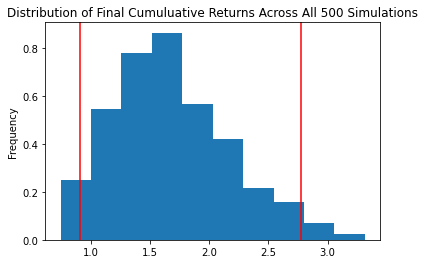

In [170]:
# Plot probability distribution and confidence intervals
dist_plot_five = MC_even_dist_five.plot_distribution()

In [171]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl_five = MC_even_dist_five.summarize_cumulative_return()
# Print summary statistics
print(even_tbl_five)

count           500.000000
mean              1.677894
std               0.488363
min               0.740969
25%               1.310414
50%               1.634094
75%               1.971390
max               3.315670
95% CI Lower      0.907920
95% CI Upper      2.779225
Name: 1260, dtype: float64


In [172]:
# Set initial investment
initial_investment_five = 60000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(even_tbl_five[8]*60000,2)
ci_upper_five = round(even_tbl_five[9]*60000,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_five} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $54475.2 and $166753.51


In [173]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_even_dist_ten = MCSimulation(portfolio_data = df_stock_data, weights = [.40,.60], num_simulation = 500, num_trading_days = 252*10)
MC_even_dist_ten.portfolio_data.head()

AGG                                       \
                             open     high       low    close   volume   
time                                                                     
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153   
2017-05-17 00:00:00-04:00  109.35  109.600  109.2800  109.560  2263851   

                                           SPY                           \
                          daily_return    open    high     low    close   
time                                                                      
2017-05-11 00:00:00-04:00          NaN  239.35  239.57  238.13  239.410   
2017-05-12 00:00:00-04:00     0.003732  239.09  239.21  238.67  239.030   
2017-05-15 00:00:00-04:00    -0.000275  239.47  240.44  239.45  240.245   
2017-05-16 00:00:00-04:00     0.001010  240.62  240.67  239.63  240.100   
2017-05-17 00:00:00-04:00     0.005138  238.10  238.64  235.75  235.850   

                                                   
                              volume daily_return  
time                                               
2017-05-11 00:00:00-04:00   45435690          NaN  
2017-05-12 00:00:00-04:00   35283567    -0.001587  
2017-05-15 00:00:00-04:00   42230620     0.005083  
2017-05-16 00:00:00-04:00   37206183    -0.000604  
2017-05-17 00:00:00-04:00  118613594    -0.017701

In [174]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_even_dist_ten.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/var/folders/pb/9nrds4y576x41j1jw01gnkc40000gn/T/ipykernel_26955/776565063.py:116: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     1.006580  1.003187  0.995388  0.996682  0.996369  1.001220  1.001913   
2     1.000890  0.994466  0.988354  1.011773  1.006923  0.998477  0.991878   
3     0.992093  0.991441  0.980526  1.018803  1.004474  0.997546  0.990251   
4     0.988780  0.992491  0.984115  1.024203  1.010951  0.994721  0.997931   
...        ...       ...       ...       ...       ...       ...       ...   
2516  3.579705  1.761131  1.889010  1.201065  2.974206  1.955099  2.047493   
2517  3.606986  1.760154  1.888329  1.195965  2.972098  1.956698  2.085771   
2518  3.616441  1.759292  1.869892  1.205018  2.990220  1.983437  2.098099   
2519  3.605603  1.732278  1.868122  1.199120  2.944829  1.983248  2.132361   
2520  3.562593  1.734076  1.864849  1.217172  2.944153  1.971322  2.127581   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     1.008859  0.999878  1.000157  ...  0.988992  1.001608  0.997253   
2     1.008886  0.977848  0.998547  ...  0.981786  1.005557  0.999260   
3     1.012792  0.983335  1.004736  ...  0.981687  1.025273  0.997318   
4     1.026733  0.994405  1.014451  ...  0.982446  1.036355  0.990994   
...        ...       ...       ...  ...       ...       ...       ...   
2516  1.678142  2.379127  1.584307  ...  7.710794  2.404607  2.477529   
2517  1.678547  2.378316  1.568622  ...  7.714393  2.397928  2.500990   
2518  1.676792  2.383428  1.573094  ...  7.738502  2.400540  2.499424   
2519  1.660727  2.355997  1.603320  ...  7.747334  2.388162  2.481119   
2520  1.646533  2.352332  1.618848  ...  7.806466  2.374110  2.497294   

           493       494       495       496       497       498       499  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     1.002571  1.008986  1.005903  1.002226  0.995194  1.021455  1.005137  
2     0.997944  1.007763  1.012717  1.003161  0.995937  1.039896  1.019817  
3     0.987660  1.013117  1.027872  1.019895  0.991393  1.027254  1.019472  
4     0.985003  1.012776  1.026276  1.028457  0.998456  1.030831  1.023357  
...        ...       ...       ...       ...       ...       ...       ...  
2516  1.252057  3.389167  2.178865  2.720151  3.136322  2.414394  2.289999  
2517  1.249469  3.358513  2.153147  2.746708  3.164000  2.375522  2.288316  
2518  1.261173  3.372831  2.129638  2.786118  3.178475  2.373165  2.297501  
2519  1.268544  3.382096  2.109396  2.760489  3.190701  2.371404  2.287074  
2520  1.277222  3.340308  2.094390  2.746916  3.174686  2.344007  2.323197  

[2521 rows x 500 columns]

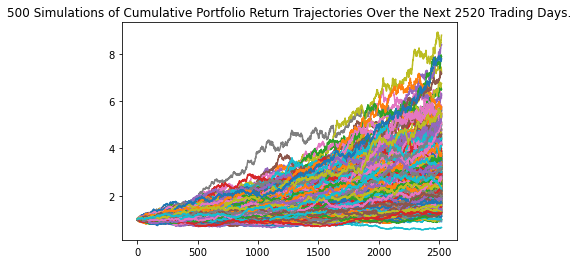

In [175]:
# Plot simulation outcomes
line_plot_ten = MC_even_dist_ten.plot_simulation()

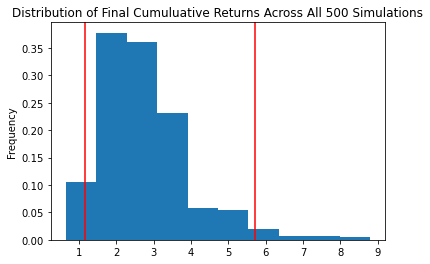

In [176]:
# Plot probability distribution and confidence intervals
dist_plot_ten = MC_even_dist_ten.plot_distribution()

In [177]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl_ten = MC_even_dist_ten.summarize_cumulative_return()
# Print summary statistics
print(even_tbl_ten)

count           500.000000
mean              2.760529
std               1.218859
min               0.649828
25%               1.887930
50%               2.535757
75%               3.312188
max               8.800730
95% CI Lower      1.159214
95% CI Upper      5.717360
Name: 2520, dtype: float64


In [178]:
# Set initial investment
initial_investment_ten = 60000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(even_tbl_ten[8]*60000,2)
ci_upper_ten = round(even_tbl_ten[9]*60000,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_ten} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $69552.83 and $343041.57
